Importância das features no modelo treinado: [0.01036488 0.09123157 0.01490633 0.02907759 0.01727819 0.02936149
 0.76157811 0.01836973 0.02783212]
Normalized Mean Absolute Error (NMAE): 0.0776
Erro Quadrático Médio (MSE): 5.36
Raiz do Erro Quadrático Médio (RMSE): 2.32


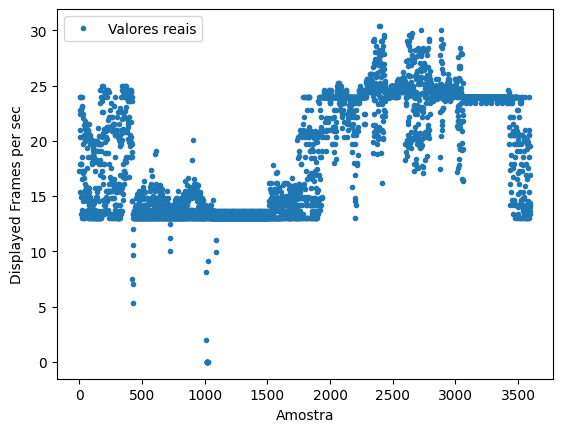

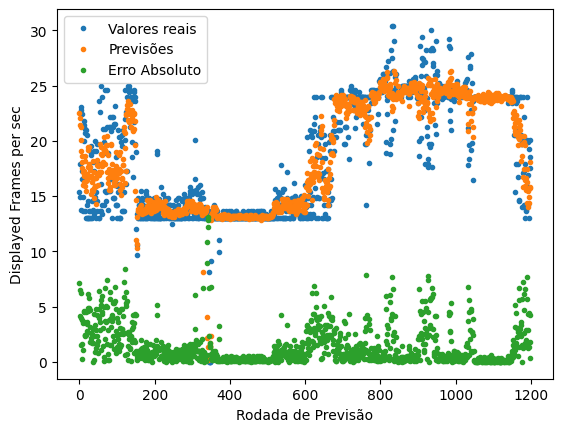

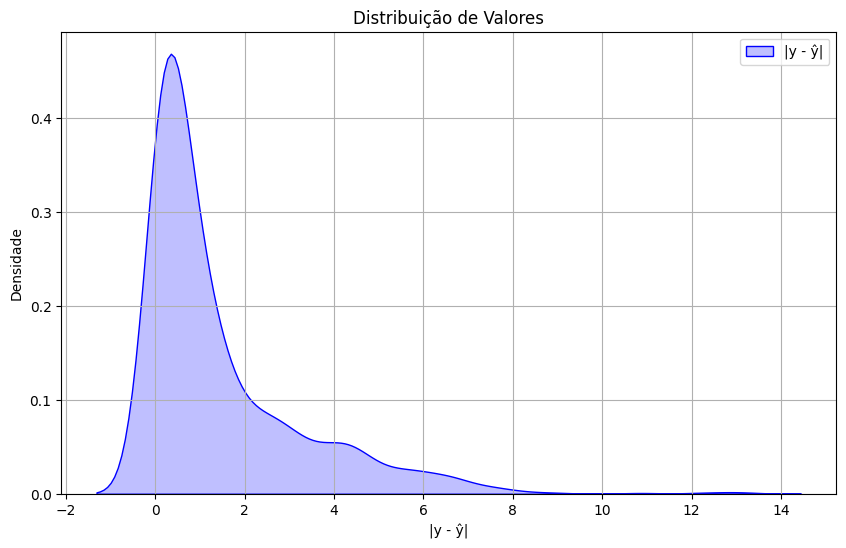

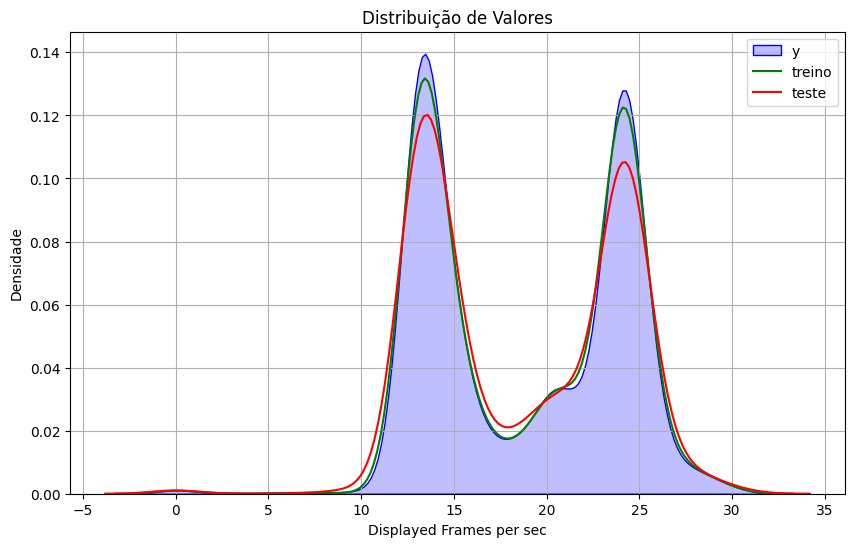

In [8]:
# Importar bibliotecas necessárias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def normalized_mean_absolute_error(y_true, y_pred):
    """
    Calcula o Normalized Mean Absolute Error (NMAE).

    Parâmetros:
    y_true (array): Valores reais.
    y_pred (array): Valores previstos.

    Retorno:
    nmae (float): Normalized Mean Absolute Error.
    """
    # Cálculo do NMAE
    nmae = (abs(y_pred - y_true.values.ravel()).mean())/y_true.values.ravel().mean()
    return nmae

# Abrir datasets X e y
X_raw = pd.read_csv('X.csv')
y_raw = pd.read_csv('Y.csv')

#Merge por timestamp e separação em X e y
merge_raw = pd.concat([X_raw, y_raw], axis=1)
X_features = ['all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s']
y_target = ['DispFrames']
X = merge_raw[X_features]
y = merge_raw[y_target]

# Dividir dados em treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Dividir dados em treinamento e teste usando K-Fold
# Definir número de folds
k = 3

# Criar objeto KFold com shuffle=False
kf = KFold(n_splits=k, shuffle=True)

# Realizar treinamento e teste com K-Fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Criar e treinar o modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train.values.ravel())

print(f"Importância das features no modelo treinado: {modelo.feature_importances_}")

# Fazer previsões
y_previsto = modelo.predict(X_test)

# Avaliar o modelo
nmae = normalized_mean_absolute_error(y_test, y_previsto)
print(f"Normalized Mean Absolute Error (NMAE): {nmae:.4f}")

mse = mean_squared_error(y_test, y_previsto)
rmse = np.sqrt(mse)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

# Visualizar os resultados
plt.plot(y.values.ravel(), marker=".", linestyle="None", label="Valores reais")
plt.xlabel("Amostra")
plt.ylabel("Displayed Frames per sec")
plt.legend()
plt.show()

plt.plot(y_test.values.ravel(), marker=".", linestyle="None", label="Valores reais")
plt.plot(y_previsto, marker=".", linestyle="None", label="Previsões")
plt.plot(abs(y_previsto - y_test.values.ravel()), marker=".", linestyle="None", label="Erro Absoluto")
plt.xlabel("Rodada de Previsão")
plt.ylabel("Displayed Frames per sec")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(abs(y_previsto - y_test.values.ravel()), color='blue', fill=True, label='|y - ŷ|')
plt.xlabel('|y - ŷ|')
plt.ylabel('Densidade')
plt.title('Distribuição de Valores')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(y['DispFrames'], color='blue', fill=True, label='y')
sns.kdeplot(y_train['DispFrames'], color='green', fill=False, label='treino')
sns.kdeplot(y_test['DispFrames'], color='red', fill=False, label='teste')
plt.xlabel('Displayed Frames per sec')
plt.ylabel('Densidade')
plt.title('Distribuição de Valores')
plt.legend()
plt.grid(True)
plt.show()


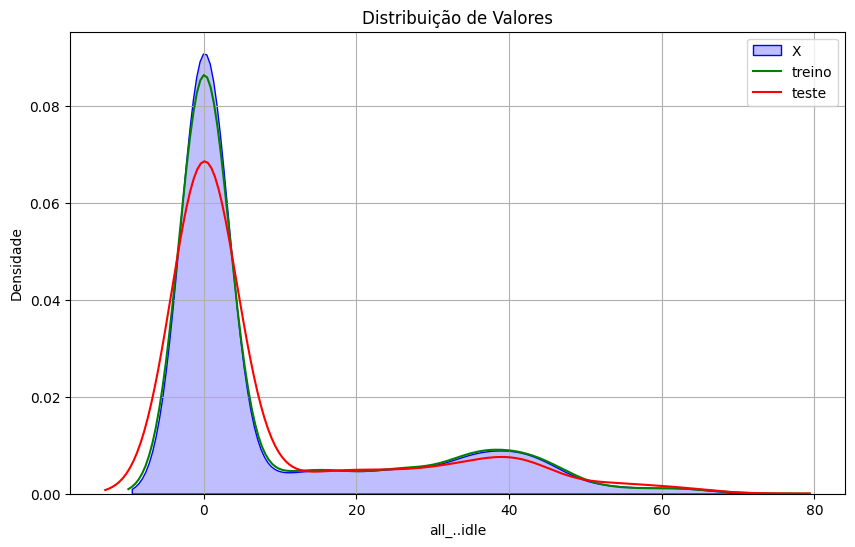

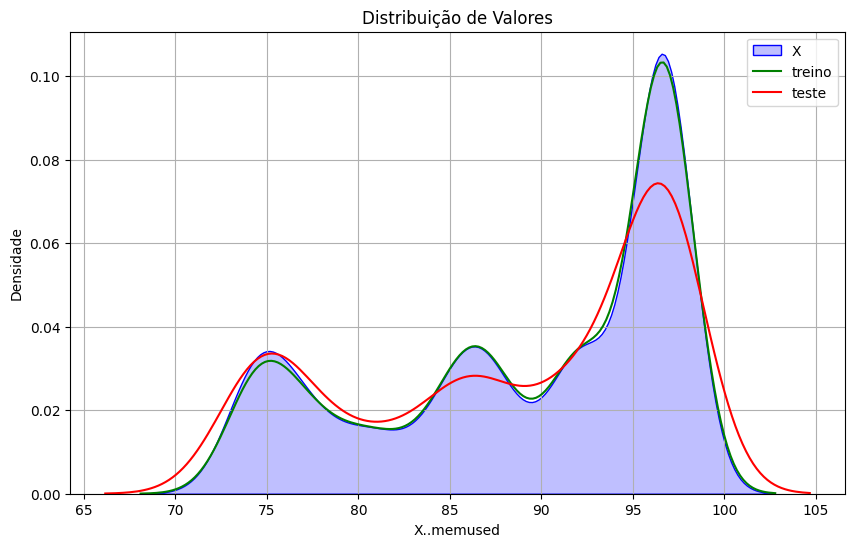

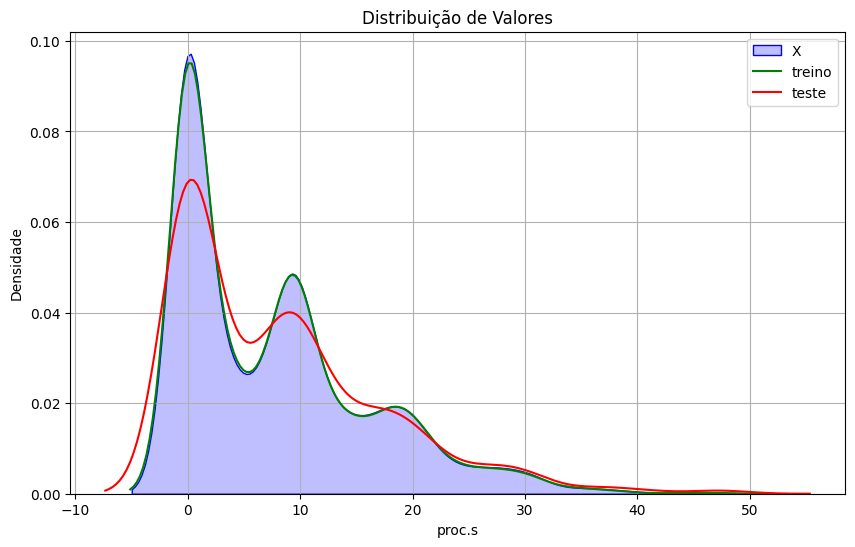

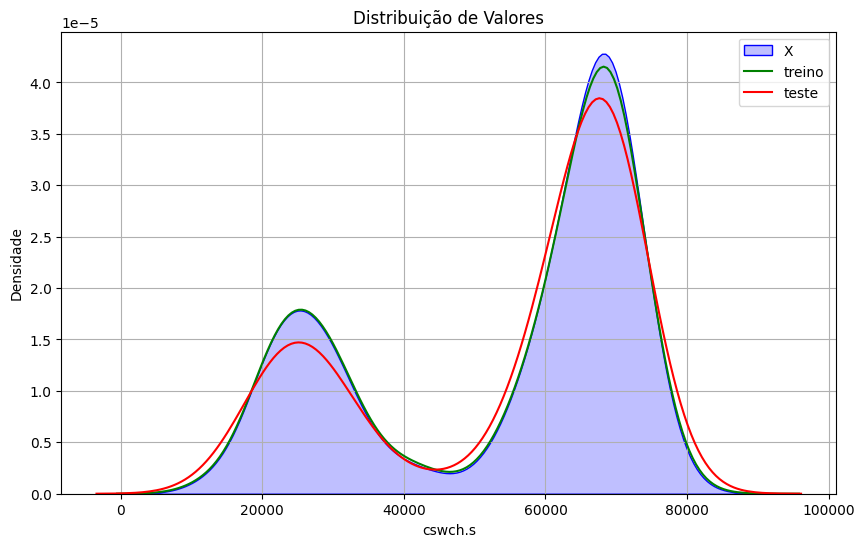

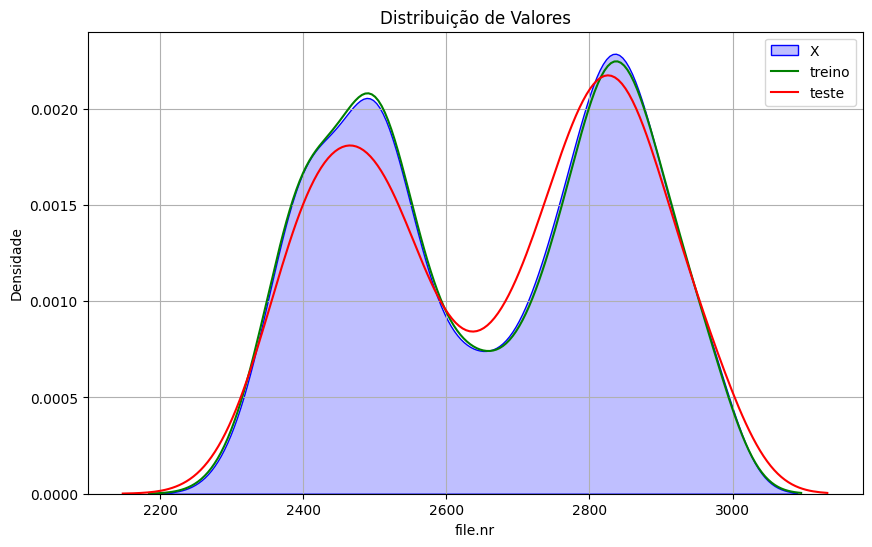

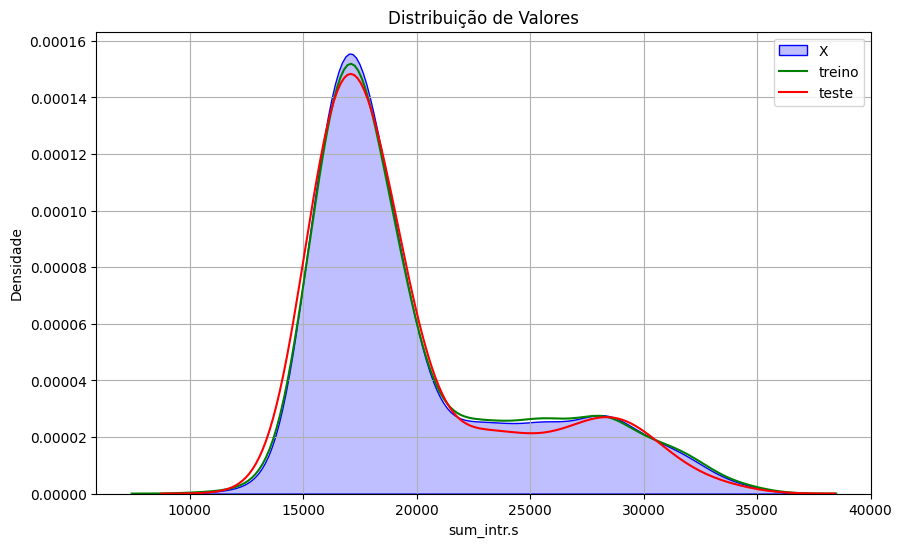

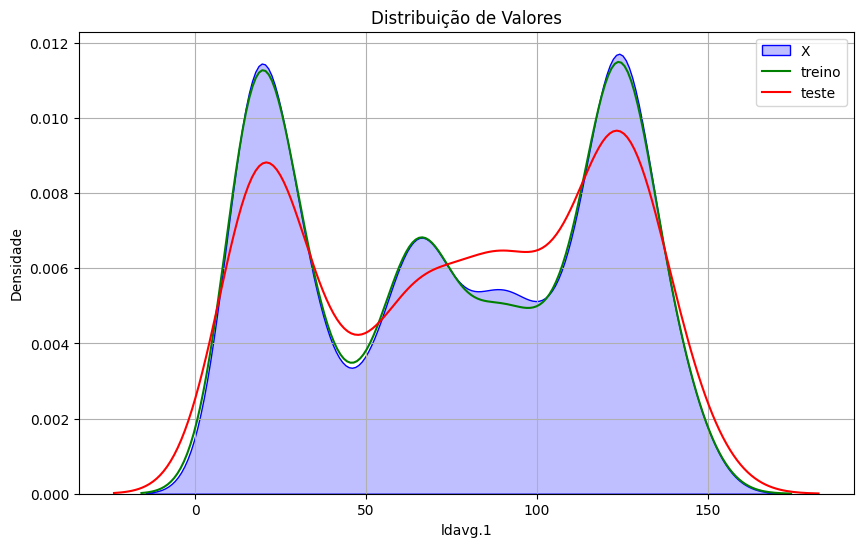

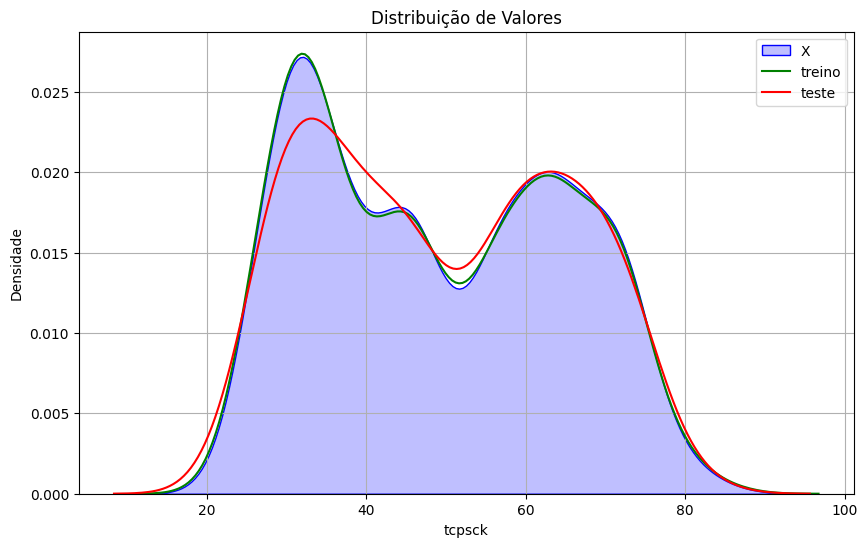

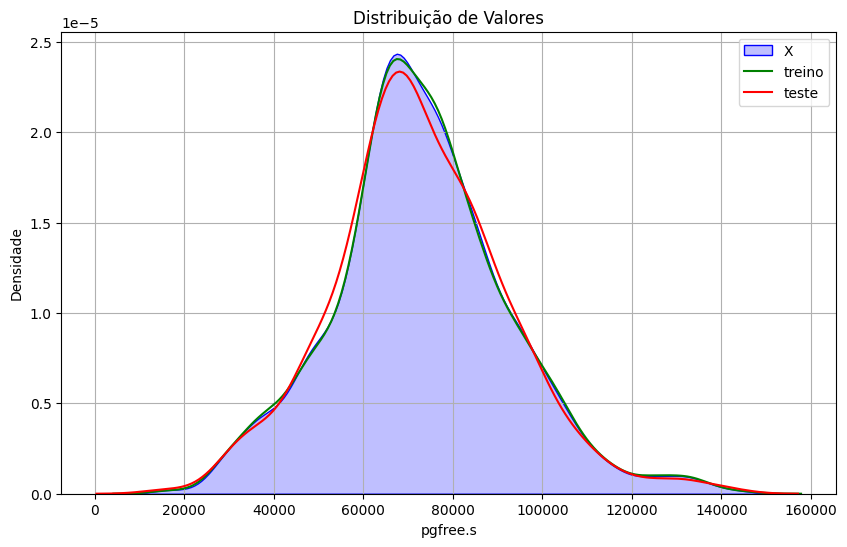

In [6]:
X_features = ['all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s']

for features in X_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(X[features], color='blue', fill=True, label='X')
    sns.kdeplot(X_train[features], color='green', fill=False, label='treino')
    sns.kdeplot(X_test[features], color='red', fill=False, label='teste')
    plt.xlabel(features)
    plt.ylabel('Densidade')
    plt.title('Distribuição de Valores')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
X_features = ['all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s']

#Dividir dados em treinamento e teste usando K-Fold
# Definir número de folds
k = 3

# Criar objeto KFold com shuffle=False
kf = KFold(n_splits=k, shuffle=True)

073287X = merge_raw[X_features]
    
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Criar e treinar o modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train.values.ravel())

print(f"Importância das features no modelo treinado: {modelo.feature_importances_}")

# Fazer previsões
y_previsto = modelo.predict(X_test)

# Avaliar o modelo
nmae = normalized_mean_absolute_error(y_test, y_previsto)
print(f"REFERENCE - Normalized Mean Absolute Error (NMAE): {nmae:.6f}")

for features in X_features:
    X_train_set = X_train[[features]]
    X_test_set = X_test[[features]]
    
    # Treinar o modelo
    modelo.fit(X_train_set, y_train.values.ravel())

    # Fazer previsões
    y_previsto = modelo.predict(X_test_set)

    # Avaliar o modelo
    nmae = normalized_mean_absolute_error(y_test, y_previsto)
    print(f"Normalized Mean Absolute Error (NMAE) with {features}: {nmae:.4f}")

Importância das features no modelo treinado: [0.01271745 0.08441981 0.01620072 0.03295668 0.02084636 0.02976165
 0.75890924 0.01529733 0.02889075]
REFERENCE - Normalized Mean Absolute Error (NMAE): 0.073287
Normalized Mean Absolute Error (NMAE) with all_..idle: 0.1304
Normalized Mean Absolute Error (NMAE) with X..memused: 0.0857
Normalized Mean Absolute Error (NMAE) with proc.s: 0.2228
Normalized Mean Absolute Error (NMAE) with cswch.s: 0.1248
Normalized Mean Absolute Error (NMAE) with file.nr: 0.1071
Normalized Mean Absolute Error (NMAE) with sum_intr.s: 0.1669
Normalized Mean Absolute Error (NMAE) with ldavg.1: 0.0797
Normalized Mean Absolute Error (NMAE) with tcpsck: 0.1046
Normalized Mean Absolute Error (NMAE) with pgfree.s: 0.2474


In [9]:
import itertools

X_features = ['all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s']

#Dividir dados em treinamento e teste usando K-Fold
# Definir número de folds
k = 3

# Criar objeto KFold com shuffle=False
kf = KFold(n_splits=k, shuffle=True)

X = merge_raw[X_features]
    
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train.values.ravel())

print(f"Importância das features no modelo treinado: {modelo.feature_importances_}")

# Fazer previsões
y_previsto = modelo.predict(X_test)

# Avaliar o modelo
nmae = normalized_mean_absolute_error(y_test, y_previsto)
print(f"REFERENCE - Normalized Mean Absolute Error (NMAE): {nmae:.6f}")

combinacoes = []
combinacoes = list(map(list, itertools.chain.from_iterable(itertools.combinations(X_features, r) for r in range(1, len(X_features) + 1))))
#combinacoes = list(map(list, itertools.chain.from_iterable(itertools.combinations(X_features, r) for r in range(3, 4))))

#for i, comb in enumerate(combinacoes):
#    print(f"Combinação {i+1}: {comb}")

for feature_set in combinacoes:
    X_train_set = X_train[feature_set]
    X_test_set = X_test[feature_set]
    
    # Treinar o modelo
    modelo.fit(X_train_set, y_train.values.ravel())

    #print(f"Importância das features no modelo treinado: {modelo.feature_importances_}")

    # Fazer previsões
    y_previsto = modelo.predict(X_test_set)

    # Avaliar o modelo
    nmae_set = normalized_mean_absolute_error(y_test, y_previsto)
#    if nmae_set <= nmae:
#       print(f"Normalized Mean Absolute Error (NMAE) with {feature_set}: {nmae_set:.6f}")

    print(f"Normalized Mean Absolute Error (NMAE) with {feature_set}: {nmae_set:.6f}")

print(f"Finalizado")

Importância das features no modelo treinado: [0.01049266 0.08349287 0.01669801 0.0295386  0.01261401 0.03959709
 0.76391282 0.0155226  0.02813134]
REFERENCE - Normalized Mean Absolute Error (NMAE): 0.075578
Normalized Mean Absolute Error (NMAE) with ['all_..idle']: 0.128627
Normalized Mean Absolute Error (NMAE) with ['X..memused']: 0.092042
Normalized Mean Absolute Error (NMAE) with ['proc.s']: 0.224741
Normalized Mean Absolute Error (NMAE) with ['cswch.s']: 0.127421
Normalized Mean Absolute Error (NMAE) with ['file.nr']: 0.106992
Normalized Mean Absolute Error (NMAE) with ['sum_intr.s']: 0.169075
Normalized Mean Absolute Error (NMAE) with ['ldavg.1']: 0.081678
Normalized Mean Absolute Error (NMAE) with ['tcpsck']: 0.108032
Normalized Mean Absolute Error (NMAE) with ['pgfree.s']: 0.238126
Normalized Mean Absolute Error (NMAE) with ['all_..idle', 'X..memused']: 0.092526
Normalized Mean Absolute Error (NMAE) with ['all_..idle', 'proc.s']: 0.128458
Normalized Mean Absolute Error (NMAE) wi

In [4]:
import pandas as pd
from sklearn.model_selection import KFold

#Carregar o arquivo CSV
df = pd.read_csv('X.csv')

#Definir o número de folds para o KFold
n_folds = 8

#Criar um objeto KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#Iterar sobre os folds
for fold, (train_index, test_index) in enumerate(kf.split(df)):
    # Extrair os conjuntos de treinamento e teste
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]
    
    # Guardar os conjuntos de dados em arquivos CSV
    df_train.to_csv(f'entregar_empresa_{fold}.csv', index=False)
    df_test.to_csv(f'guardar_conosco_{fold}.csv', index=False)
    
    # Parar após o primeiro fold, pois você só precisa de um conjunto de treinamento e teste
    break